# **Uber Data Analysis**


# **Objective**
# Identify Supply and Demand gap and root cause for this Problem.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
df=pd.read_csv('Uber Request Data (1).csv')

In [33]:
#show frist 5 rows
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


# **Data Understanding**

*   Request id: A unique identifier of the requests.
*   Pick-up point: The point from which the request was made.
*   Driver id: The unique identification number of the driver.
*   Status of the request: The final status of the trip, that can be either completed,cancelled by the driver or no cars available.
*   Request timestamp: The date and time at which the customer made the trip request.
*   Drop timestamp: The drop-off date and time, in case the trip was completed.

In [34]:
#show numbers of rows and columns
df.shape

(6745, 6)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


**Convert Column(Request timestamp) to datetime datatype.**


In [25]:
df['Request timestamp'] = df['Request timestamp'].str.replace("/", "-")
df['Request timestamp']=pd.to_datetime(df['Request timestamp'],dayfirst=True)

**Split Column (Request timestamp) to (date-of-request , day-of-request and hour-of-request)**

In [26]:
df['Date of Request'] = df['Request timestamp'].dt.date
df['Day of Request'] = df['Request timestamp'].dt.day
df['Hour of Request'] = df['Request timestamp'].dt.hour
df.drop('Request timestamp',axis=1,inplace=True)

**Convert Column(Drop timestamp) to datetime datatype**







In [27]:
df['Drop timestamp'] = df['Drop timestamp'].str.replace("/","-")
df['Drop timestamp']=pd.to_datetime(df['Drop timestamp'],dayfirst=True)

**Split Column (Drop timestamp) to (drop-date , drop-day and drop-hour)**


In [28]:
df['Drop date '] = df['Drop timestamp'].dt.date
df['Drop day'] = df['Drop timestamp'].dt.day
df['Drop hour'] = df['Drop timestamp'].dt.hour
df.drop("Drop timestamp",axis=1,inplace=True)

# Let's take a look on the data after the changes We have made.

In [29]:
df.head()

,Request id,Pickup point,Driver id,Status,Date of Request,Day of Request,Hour of Request,Drop date,Drop day,Drop hour
0,619,Airport,1.0,Trip Completed,2016-07-11,11,11,2016-07-11,11.0,13.0
1,867,Airport,1.0,Trip Completed,2016-07-11,11,17,2016-07-11,11.0,18.0
2,1807,City,1.0,Trip Completed,2016-07-12,12,9,2016-07-12,12.0,9.0
3,2532,Airport,1.0,Trip Completed,2016-07-12,12,21,2016-07-12,12.0,22.0
4,3112,City,1.0,Trip Completed,2016-07-13,13,8,2016-07-13,13.0,9.0


**Extract unique dates from date of request and drop date.**

In [30]:
print(df['Date of Request'].unique())
print("\n")
print(df['Drop date '].unique())

[datetime.date(2016, 7, 11) datetime.date(2016, 7, 12)
 datetime.date(2016, 7, 13) datetime.date(2016, 7, 14)
 datetime.date(2016, 7, 15)]


[datetime.date(2016, 7, 11) datetime.date(2016, 7, 12)
 datetime.date(2016, 7, 13) datetime.date(2016, 7, 14)
 datetime.date(2016, 7, 15) datetime.date(2016, 7, 16) NaT]


# We can see that there are trips that has ended on the next day .
## Let's check how many?

In [31]:
print(df['Drop date '].value_counts())

2016-07-11    582
2016-07-13    569
2016-07-12    568
2016-07-15    546
2016-07-14    536
2016-07-16     30
Name: Drop date , dtype: int64



*   30 trips has ended on the next day (midnight trips) .



## **Data Visualization**

Text(0, 0.5, 'No. of Requests')

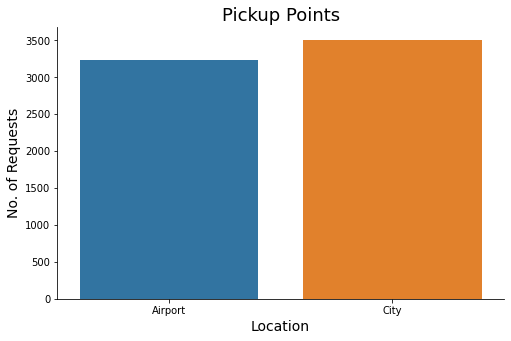

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Pickup point", data=df)
sns.despine()
plt.title("Pickup Points", fontsize = 18)
plt.xlabel("Location", fontsize = 14)
plt.ylabel("No. of Requests", fontsize = 14)


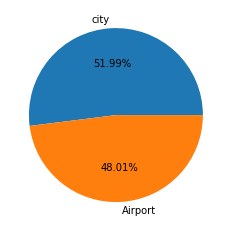

In [ ]:
label= [ "city","Airport"]
plt.pie(df["Pickup point"].value_counts(), labels = label,autopct = '%2.2f%%')
plt.show() 

In [ ]:
df["Pickup point"].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

## **Pickup Location summary :**
*    city   : 3507 trips (51.99%)
*  Airport : 3238 trips (48.01%)

# Conclusion
# Both Locations has close number of requests.

# Let's take a look on Status of requests.

Text(0, 0.5, 'No. of trips')

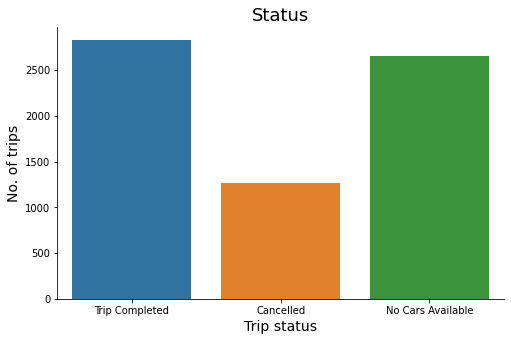

In [ ]:
plt.figure(figsize=(8, 5))
g = sns.countplot(x="Status", data=df)
sns.despine()
plt.title("Status", fontsize = 18)
plt.xlabel("Trip status", fontsize = 14)
plt.ylabel("No. of trips", fontsize = 14)

In [ ]:
df["Status"].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

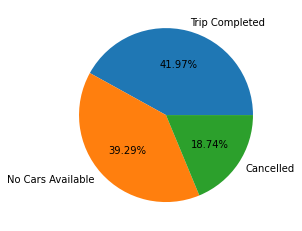

In [ ]:
label= [ "Trip Completed","No Cars Available","Cancelled"]
plt.pie(df["Status"].value_counts(), labels = label,autopct = '%2.2f%%')
plt.show() 

## **status summary :**
*   Trip Completed    : 2831 trips (41.97%)
*   No Cars Available : 2650 trips (39.29%)
*   Cancelled trips   : 1264 trips (18.74%)


# Uber Requests Serviceability

Text(0, 0.5, 'No. of trips')

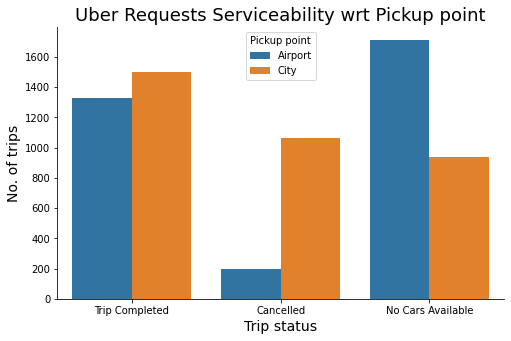

In [ ]:
plt.figure(figsize=(8, 5))
g = sns.countplot(x="Status",hue='Pickup point' ,data=df)
sns.despine()
plt.title("Uber Requests Serviceability wrt Pickup point", fontsize = 18)
plt.xlabel("Trip status", fontsize = 14)
plt.ylabel("No. of trips", fontsize = 14)

Text(0, 0.5, 'No. of trips')

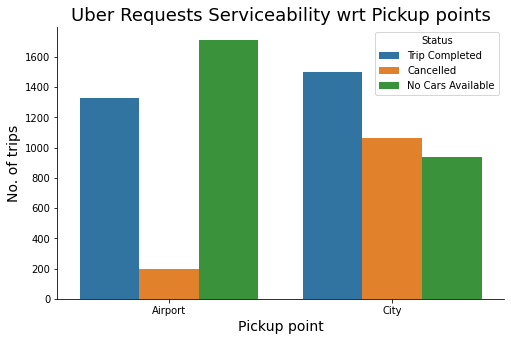

In [ ]:
plt.figure(figsize=(8, 5))
g = sns.countplot(x='Pickup point' ,hue='Status',data=df)
sns.despine()
plt.title("Uber Requests Serviceability wrt Pickup points", fontsize = 18)
plt.xlabel("Pickup point", fontsize = 14)
plt.ylabel("No. of trips", fontsize = 14)


# **Conclusion**


*   Completed Trips are higher in the city than Airport.
*   The number of cancelled requests at the City is higher than Airport.

*   The issue of Car availability is more pressing at airport than in the city.


# Supply Gap in City

In [ ]:
len(df[(df["Pickup point"] == "City") & ((df["Status"] == "Cancelled" )| (df["Status"] == "No Cars Available")) ])

2003

# Supply Gap in the Airport

In [ ]:
len(df[(df["Pickup point"] == "Airport") & ((df["Status"] == "Cancelled" )| (df["Status"] == "No Cars Available")) ])

1911

# Now let's have some insights on daily requests.

In [ ]:
#convert every date to day name
def day(x):
    'divide the time of the day into four categories'
    if  x == 11:
        return "Monday"
    elif x==12:
        return "Tuesday"
    elif x==13:
        return "Wenesday"
    elif x==14:
        return "Thursday"
    elif x==15:
        return "Friday"
    else:
        return "Saturday"

df['Week_days'] = df['Day of Request'].apply(lambda x: day(x))


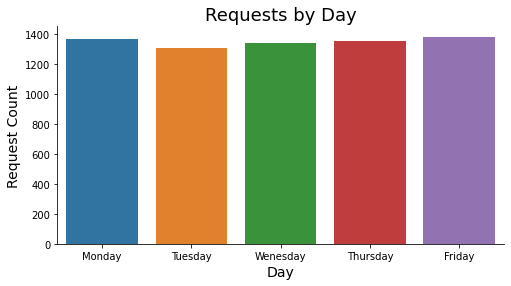

Friday      1381
Monday      1367
Thursday    1353
Wenesday    1337
Tuesday     1307
Name: Week_days, dtype: int64

In [ ]:
#Plotting requests on each day
plt.figure(figsize=(8,4))
sns.countplot(x='Week_days', data=df)
sns.despine()
plt.title("Requests by Day", fontsize = 18)
plt.xlabel("Day", fontsize = 14)
plt.ylabel("Request Count", fontsize = 14)
plt.show()
df['Week_days'].value_counts()

# Conclusion



*   They seem equally distributed but , It seems that Friday has slightly higher number of requests.



# Daily requests wrt Pickup point

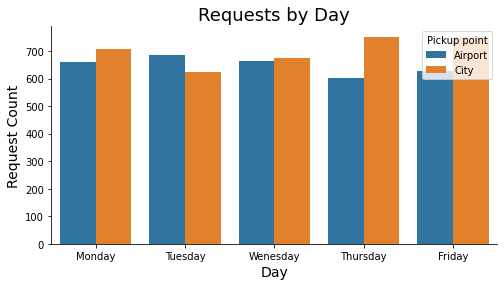

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Week_days',hue='Pickup point',data=df)
sns.despine()
plt.title("Requests by Day", fontsize = 18)
plt.xlabel("Day", fontsize = 14)
plt.ylabel("Request Count", fontsize = 14)
plt.show()



* Thursday and Friday  have the highest number of requests in the City which equals 752.
* Tuesday has the highest number of requests in the Airport which equals 684.



# Daily Requests wrt Status

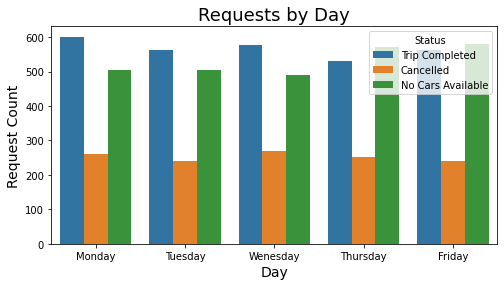

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Week_days',hue='Status',data=df)
plt.title("Requests by Day", fontsize = 18)
plt.xlabel("Day", fontsize = 14)
plt.ylabel("Request Count", fontsize = 14)
plt.show()

# Let's take a look on uber requests on hourly basis.

# The no of Requests on hourly basis at a certain week day.

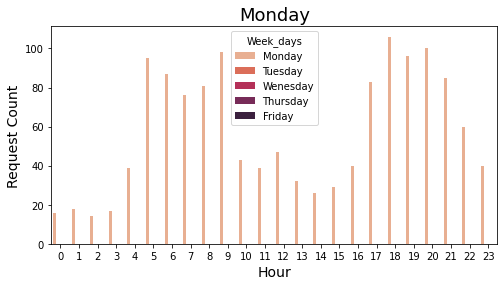

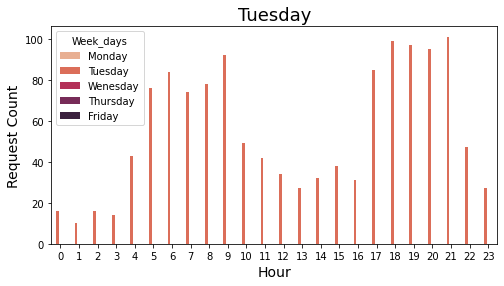

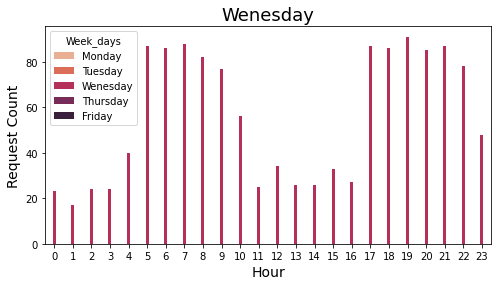

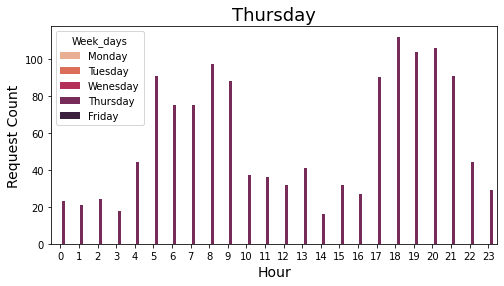

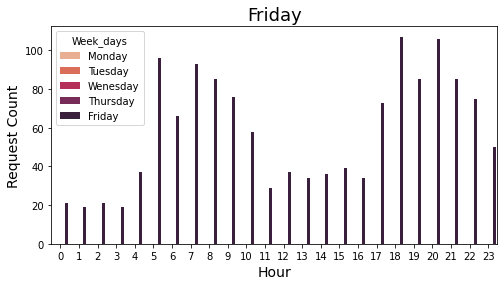

In [ ]:
for i in df["Week_days"].unique():
  plt.figure(figsize=(8,4))
  d=df[df["Week_days"]==i]
  sns.countplot(x='Hour of Request',hue=df["Week_days"],data=d,palette="rocket_r")
  plt.title(i, fontsize = 18)
  plt.xlabel("Hour", fontsize = 14)
  plt.ylabel("Request Count", fontsize = 14)
  plt.show()

# Pick up points on hourly basis


Text(0, 0.5, 'count of trips')

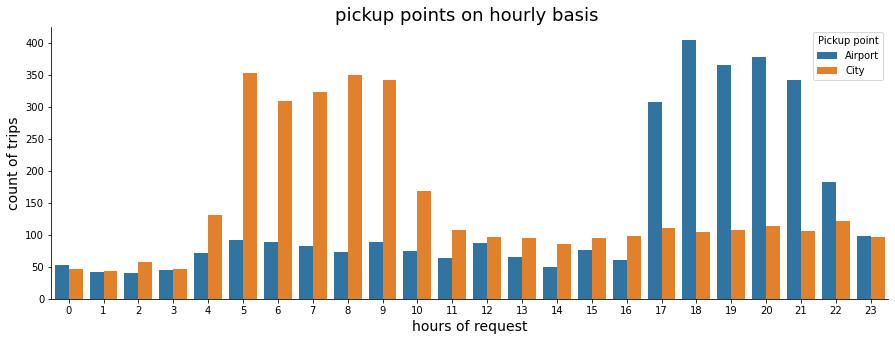

In [ ]:
plt.figure(figsize=(15, 5))
g = sns.countplot(x="Hour of Request",hue='Pickup point', data=df)
sns.despine()
plt.title("pickup points on hourly basis ", fontsize = 18)
plt.xlabel("hours of request", fontsize = 14)
plt.ylabel("count of trips", fontsize = 14)

# **Conclusion**


*   Most requests at the Airport happens around 6:00 pm.
*   Most requests at the City happens around 5:00 am.




# Request Status on hourly basis

Text(0, 0.5, 'No. of trips')

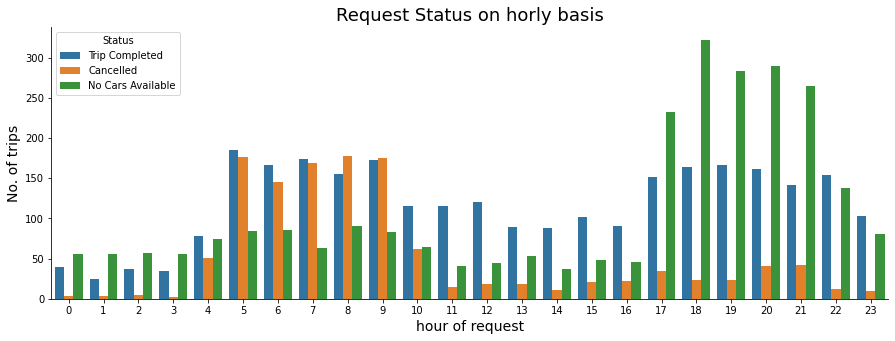

In [ ]:
plt.figure(figsize=(15, 5))
g = sns.countplot(x="Hour of Request",hue='Status', data=df)
sns.despine()
plt.title("Request Status on horly basis", fontsize = 18)
plt.xlabel("hour of request", fontsize = 14)
plt.ylabel("No. of trips", fontsize = 14)

# Now Let's check hourly status in diffrent Pickup points.

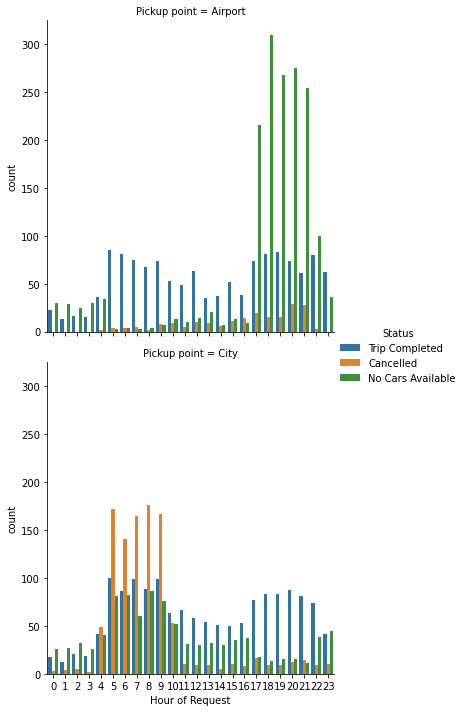

In [7]:
sns.catplot(x = "Hour of Request", hue = "Status", row = "Pickup point", data = df, kind = "count")


# **Conclusion**
*   At 6:00 pm where most no of requests happen in the Airport it was found that the no of unavailable cars are so high.
*   At 5:00 am where most no of requests happen in the City it was found that the no of cancelled cars are so high.



# Now Let's check status of requests on each day at a certain hour.

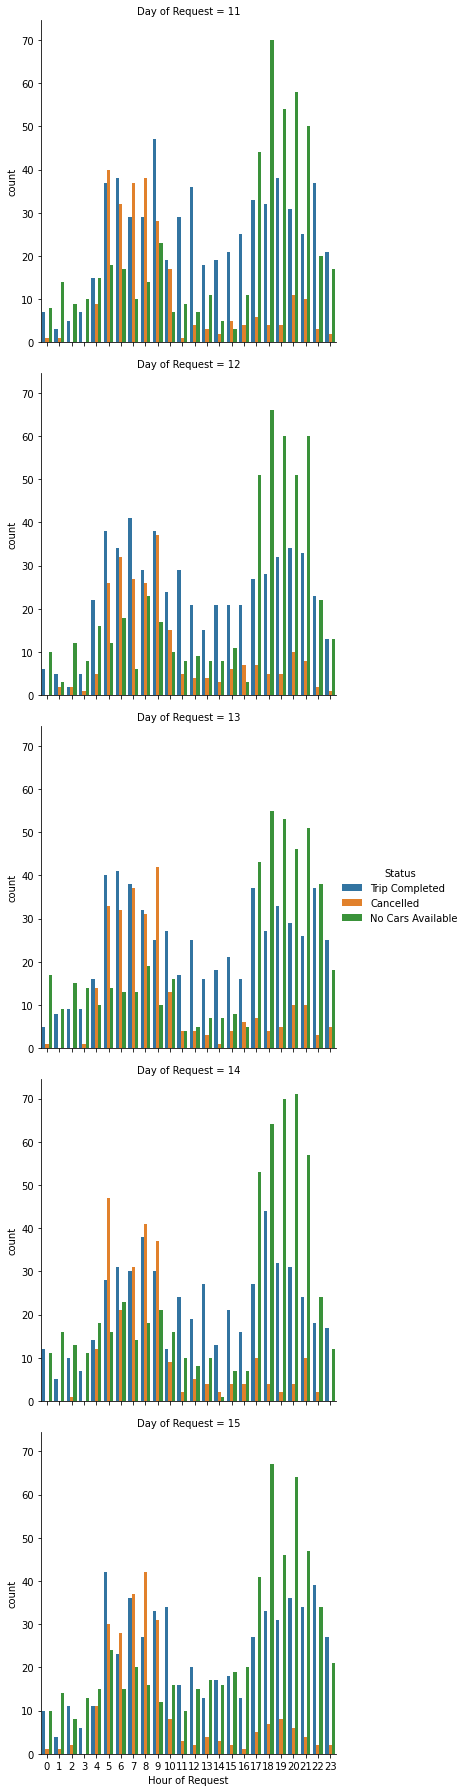

In [8]:
sns.catplot(x = "Hour of Request", hue = "Status", row = "Day of Request", data = df, kind = "count")

# **Conclusion**

*   Starting from 5:00 pm the no of unavaliable cars increase in a very high range.
*   Starting from 5:00 am the no of cancelled trips increase in a very high range.



## Creating a time slot for various time periods 

In [7]:

def time_period(x):
    'divide the time of the day into four categories'
    if x < 5:
        return "Pre_Morning"
    elif 5 <= x < 10:
        return "Morning_Rush"
    elif 10 <= x < 17:
        return "Day_Time"
    elif 17 <= x < 22:
        return "Evening_Rush"
    else:
        return "Late_Night"

df['time_slot'] = df['Hour of Request'].apply(lambda x: time_period(x))

# Further Airport analysis

# Creating Dataframe containg Status of each time slot at Airport.

In [9]:
airport = df[df['Pickup point'] == 'Airport']
airport_analysis = pd.DataFrame(airport.groupby('time_slot')['Status'].value_counts())
airport_analysis


Status
time_slot    Status                   
Day_Time     Trip Completed        327
             No Cars Available      87
             Cancelled              64
Evening_Rush No Cars Available    1321
             Trip Completed        373
             Cancelled             106
Late_Night   Trip Completed        142
             No Cars Available     136
             Cancelled               3
Morning_Rush Trip Completed        382
             Cancelled              23
             No Cars Available      21
Pre_Morning  No Cars Available     148
             Trip Completed        103
             Cancelled               2


# **Conclusion**

*   Supplying Customer requests at Evening Rush is too low.







# Evening Rush at Airport

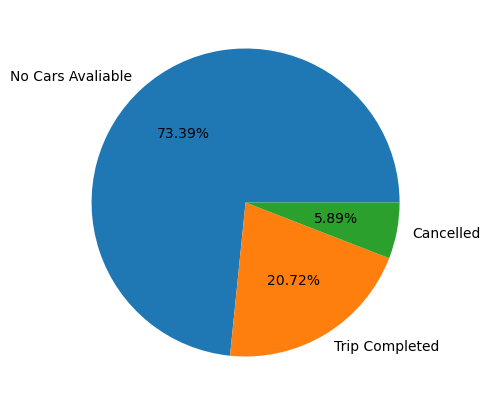

In [13]:
Airport_Evening_rush = airport.loc[df.time_slot == "Evening_Rush"]
plt.figure(figsize=(8, 5))

label= ["No Cars Avaliable","Trip Completed","Cancelled"]
plt.pie(Airport_Evening_rush["Status"].value_counts(), labels = label,autopct = '%2.2f%%')
plt.show() 


# Further City Analysis

# Creating Dataframe containg Status of each time slot at City.

In [14]:
City =df[df['Pickup point']=='City']
City_analysis=pd.DataFrame(City.groupby('time_slot')['Status'].value_counts())
City_analysis

Status
time_slot    Status                   
Day_Time     Trip Completed        395
             No Cars Available     247
             Cancelled             104
Evening_Rush Trip Completed        411
             No Cars Available      71
             Cancelled              60
Late_Night   Trip Completed        115
             No Cars Available      83
             Cancelled              19
Morning_Rush Cancelled             820
             Trip Completed        472
             No Cars Available     385
Pre_Morning  No Cars Available     151
             Trip Completed        111
             Cancelled              63

# **Conclusion**

*   Supplying Customer needs at Morning rush is too low.


# Morning rush at City

C:\Users\MN\AppData\Local\Temp\ipykernel_3204\2135385549.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  City_Morning_Rush= City[df.time_slot == "Morning_Rush"]


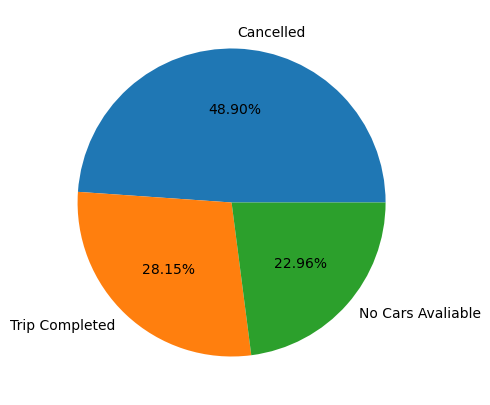

In [15]:
City_Morning_Rush= City[df.time_slot == "Morning_Rush"]
plt.figure(figsize=(8, 5))
label= ["Cancelled","Trip Completed","No Cars Avaliable"]
plt.pie(City_Morning_Rush["Status"].value_counts(), labels = label,autopct = '%2.2f%%')
plt.show() 

# **Conclusion**


*   Due to high Demand in the city at Evening rush it caused unavailability of cars in the Airport leaving a strong gap between supply and Demand in Airport.
*  Due to high Demand in the Airport at Morning Rush the no of cancelled trips increased at City.


# Some insights on Supply and demand gap

In [ ]:
df["Supply_demand"] = ["supply" if x == "Trip Completed" else "Demand" for x in df["Status"]]

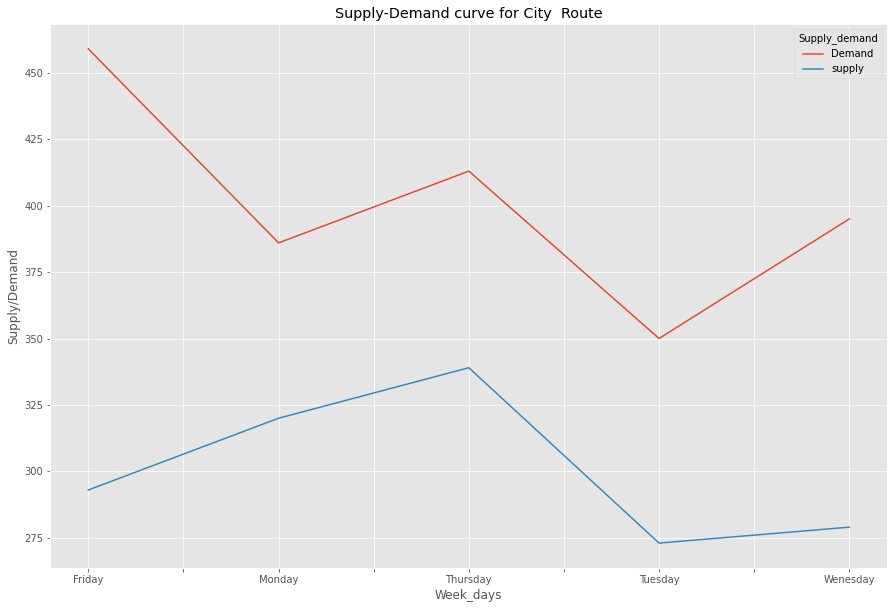

In [ ]:
df_city_to_airport_supply_demand=df[df["Pickup point"]=='City']
plt.style.use('ggplot')
df_city_to_airport_supply_demand.groupby(['Week_days','Supply_demand']).Supply_demand.count().unstack().plot.line(legend=True, figsize=(15,10))
plt.title('Supply-Demand curve for City  Route')
plt.xlabel('Week_days')
plt.ylabel('Supply/Demand')
plt.show()

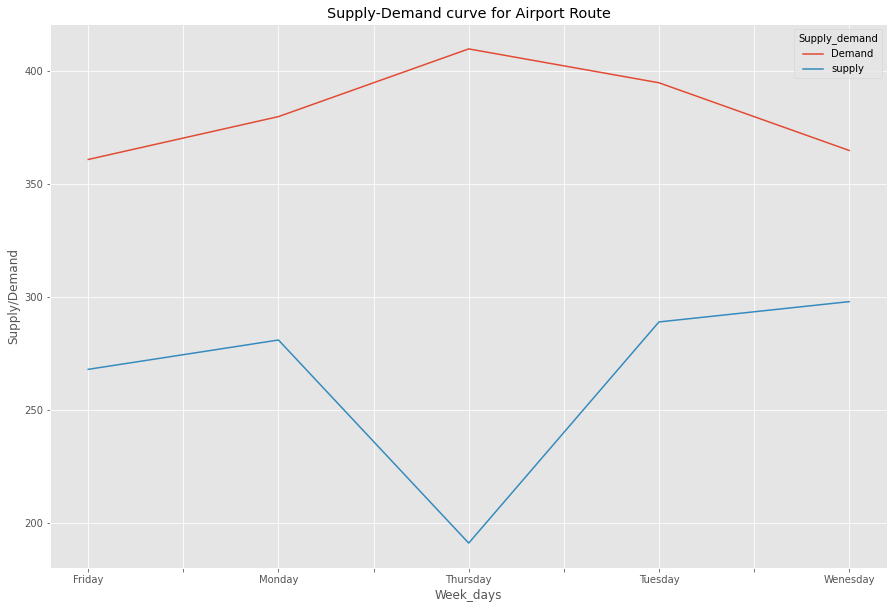

In [ ]:
df_city_to_airport_supply_demand=df[df["Pickup point"]=='Airport']
plt.style.use('ggplot')
df_city_to_airport_supply_demand.groupby(['Week_days','Supply_demand']).Supply_demand.count().unstack().plot.line(legend=True, figsize=(15,10))
plt.title('Supply-Demand curve for Airport Route')
plt.xlabel('Week_days')
plt.ylabel('Supply/Demand')
plt.show()

In [ ]:
#id of driver that has max numbers of completed trips
(df[df["Status"]=="Trip Completed"]["Driver id"].value_counts()).head(1)

22.0    16
Name: Driver id, dtype: int64

In [ ]:
#id of driver that has max numbers of cancelled trips
(df[df["Status"]=="Cancelled"]["Driver id"].value_counts()).head(1)

84.0    12
Name: Driver id, dtype: int64